# Proyecto de Predicción de Precios de Departamentos 📊
# 1. Introducción
**En este proyecto, se ha desarrollado un modelo de regresión lineal para predecir el precio de propiedades residenciales utilizando el dataset Saratoga Houses. El objetivo principal es entender cómo las características de las casas, como el tamaño del lote, área habitable, número de dormitorios y baños, entre otros, afectan el precio de venta de las propiedades. El modelo se ha entrenado y evaluado utilizando un conjunto de entrenamiento y de prueba para determinar su precisión y desempeño.**

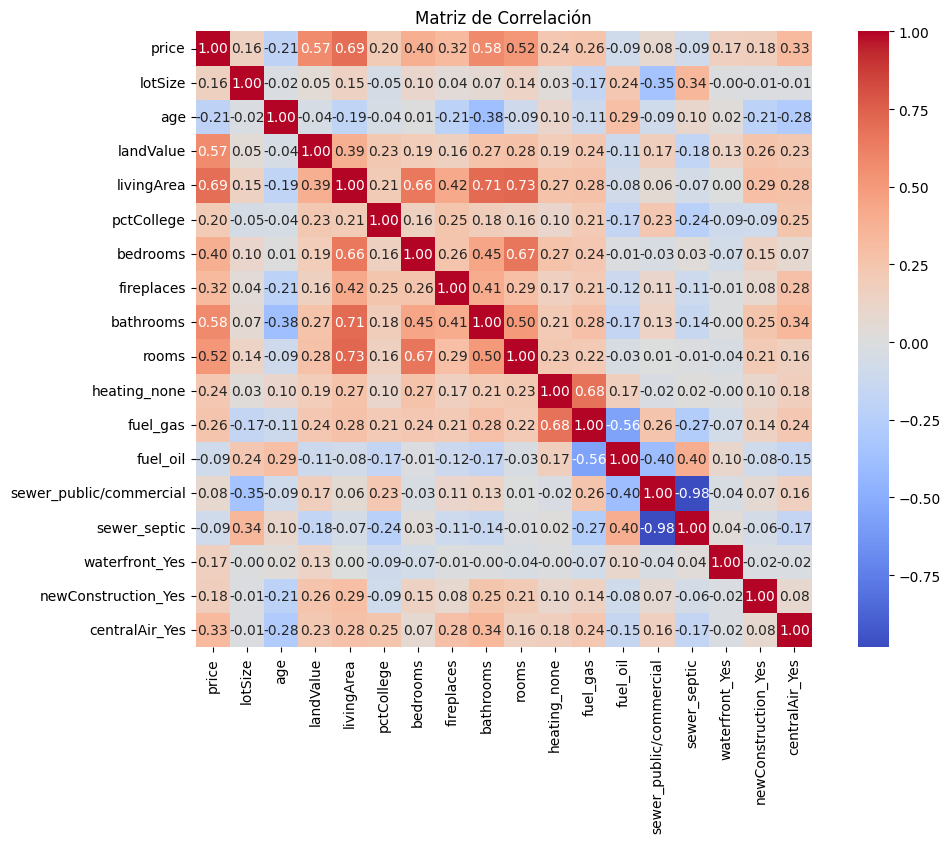

R²: 0.6729
RMSE: 51450.27


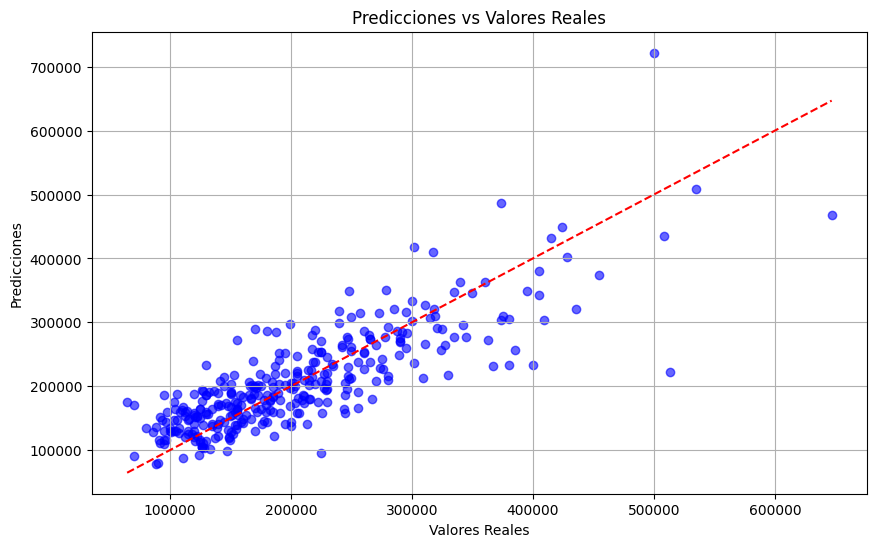

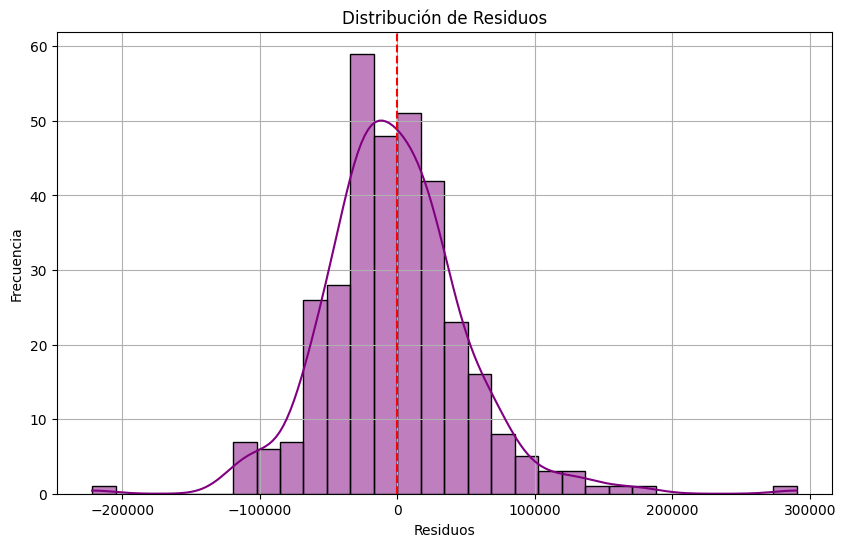

<Figure size 1400x1000 with 0 Axes>

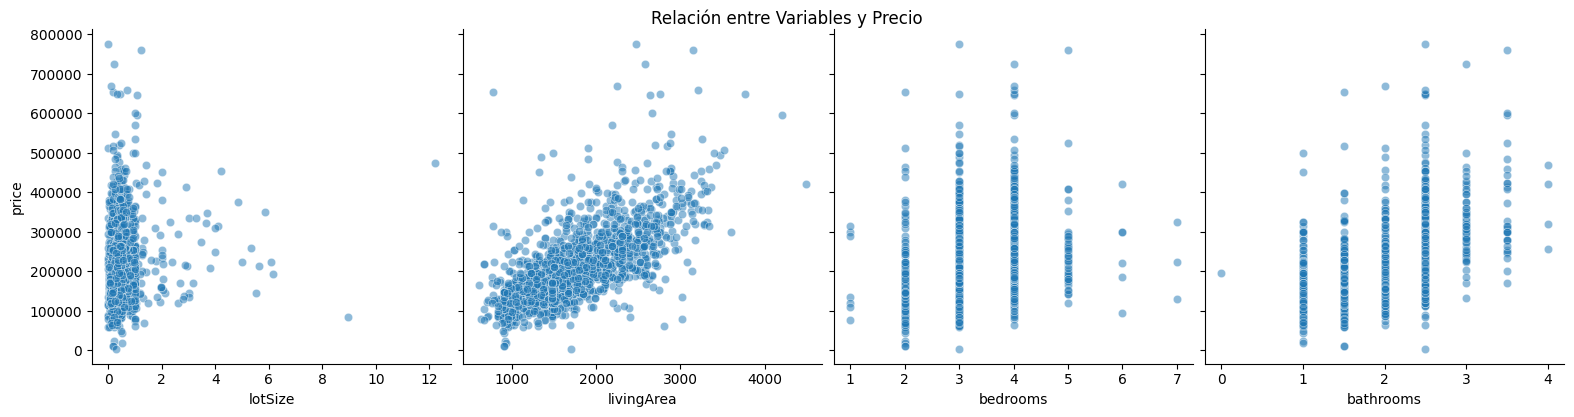

        Real     Prediccion     Diferencia
1433  229000  193347.043592   35652.956408
768   120975  114042.808940    6932.191060
1648  150000  127908.337035   22091.662965
51     64500  174662.408668 -110162.408668
192   170000  165099.967336    4900.032664
495   154000  138597.522244   15402.477756
920   137000  118731.444551   18268.555449
633   121000  151029.255736  -30029.255736
1671  302000  236785.360868   65214.639132
1385  335000  277167.702366   57832.297634


In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Paso 1: Cargar y limpiar los datos
df = pd.read_excel("SaratogaHouses.xlsx")

# Limpiar columnas que pueden tener valores no numéricos
# Convertir 'fireplaces' a numérico, reemplazando errores por NaN
df['fireplaces'] = pd.to_numeric(df['fireplaces'], errors='coerce')

# Limpiar 'heating', asegurándonos de que solo tiene valores válidos
df['heating'] = df['heating'].astype(str).str.lower()  # Convertir a minúsculas
valid_heating_options = ['electric', 'gas', 'oil', 'none']  # Lista de opciones válidas
df['heating'] = np.where(df['heating'].isin(valid_heating_options), df['heating'], 'none')  # Reemplazar valores inválidos por 'none'

# Convertir 'heating' a tipo categoría
df['heating'] = df['heating'].astype('category')

# Paso 2: Eliminar filas con valores NaN
df.dropna(inplace=True)

# Convertir variables categóricas a variables dummy
df_processed = pd.get_dummies(df, columns=['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir'], drop_first=True)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df_processed.drop('price', axis=1)
y = df_processed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Visualizar la matriz de correlación solo con columnas numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df_processed.corr()  # Usar df_processed
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Paso 5: Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print(f'R²: {r_squared:.4f}')
print(f'RMSE: {rmse:.2f}')

# Paso 6: Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

# Paso 7: Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

# Paso 8: Gráfico de dispersión entre características y el precio
plt.figure(figsize=(14, 10))
sns.pairplot(df_processed, x_vars=['lotSize', 'livingArea', 'bedrooms', 'bathrooms'], y_vars='price', height=4, plot_kws={'alpha': 0.5})
plt.suptitle('Relación entre Variables y Precio', y=1.02)
plt.show()

# paso 9: Mostrar las primeras 10 predicciones junto con los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})
resultados['Diferencia'] = resultados['Real'] - resultados['Prediccion']
print(resultados.head(10))  # Muestra las primeras 10 filas




# 2. Pasos del Análisis 🔧
**Cargar y Limpiar los Datos**: Se cargaron los datos desde un archivo Excel y se realizó la limpieza de los mismos, eliminando valores nulos y estandarizando las variables categóricas como el tipo de calefacción. Además, las variables categóricas fueron convertidas a dummies para su uso en el modelo de regresión.

**Matriz de Correlación:** Se generó una matriz de correlación entre las variables numéricas para identificar relaciones entre las características de las propiedades y el precio. Esto nos permitió identificar variables que podrían tener un mayor impacto en el precio de las propiedades.

**Modelo de Regresión Lineal:** Se utilizó el algoritmo de regresión lineal para ajustar un modelo utilizando el conjunto de entrenamiento. Luego, se evaluó el modelo utilizando el conjunto de prueba y se calcularon los valores de R² y RMSE para medir su precisión y el error promedio.

# 3. Resultados 📊

*   **R² (Coeficiente de Determinación):** El valor obtenido de R² fue de 0.6729,lo que significa que el modelo es capaz de explicar el 67% de la variabilidad en los precios de las propiedades en función de las características incluidas.

*   **RMSE (Raíz del Error Cuadrático Medio):** El RMSE fue de 51,450.27, lo que sugiere que, en promedio, el modelo tiene un margen de error de aproximadamente 51,450 dólares en las predicciones de los precios de las casas.

A continuación, se muestran algunos ejemplos de las predicciones del modelo comparadas con los valores reales:

| Real     | Predicción | Diferencia  |
|----------|------------|-------------|
| 229,000  | 193,347.04 | 35,652.96   |
| 120,975  | 114,042.81 | 6,932.19    |
| 150,000  | 127,908.34 | 22,091.66   |
| 64,500   | 174,662.41 | -110,162.41 |
| 170,000  | 165,099.97 | 4,900.03    |
| 154,000  | 138,597.52 | 15,402.48   |
| 137,000  | 118,731.44 | 18,268.56   |
| 121,000  | 151,029.26 | -30,029.26  |
| 302,000  | 236,785.36 | 65,214.64   |
| 335,000  | 277,167.70 | 57,832.30   |

**Interpretación:**

1.   **Distribución de los errores:** La mayoría de las predicciones están relativamente cerca de los valores reales, aunque en algunos casos (como la cuarta fila), se observan diferencias más significativas. Esto puede deberse a la falta de información en algunas características o a la necesidad de un modelo más complejo que capture mejor ciertos patrones.
2.   **Tendencias generales:** A medida que los precios reales aumentan, las predicciones del modelo también tienden a subir, lo que indica que el modelo es capaz de captar la tendencia general de los datos, aunque con errores en algunos casos.

# 4. Interpretación de los Gráficos 🔍 :

1.  **Matriz de Correlación:** entre las variables numéricas para identificar relaciones entre las características de las propiedades y el precio. Esto nos permitió identificar variables que podrían tener un mayor impacto en el precio de las propiedades.

2.  **Predicciones vs Valores Reales:** Este gráfico de dispersión compara las predicciones del modelo con los valores reales. La línea roja discontinua muestra el escenario ideal donde las predicciones serían perfectas. Aunque la mayoría de las predicciones están cercanas a la línea, algunas se alejan, lo que indica errores en ciertas predicciones. Sin embargo, se mantiene una tendencia positiva: a medida que los valores reales aumentan, las predicciones del modelo también tienden a crecer.Elemento de lista

3.   **Distribución de Residuos:** Este histograma muestra cómo se distribuyen los residuos (diferencia entre valores reales y predichos). La distribución es simétrica alrededor de cero, lo que sugiere que el modelo no tiene sesgos significativos. La línea roja vertical marca el valor cero, indicando que la mayoría de los errores se concentran cerca de este valor. Además, la forma en campana de la distribución indica que los residuos siguen una distribución cercana a la normal, lo cual es un buen indicador de un ajuste correcto y que el modelo no comete errores sistemáticos graves

4.   **Relación entre Variables y Precio:** Este gráfico relaciona distintas características de las propiedades con sus precios.

*   **lotSize vs. Price:** A mayor tamaño del lote, el precio tiende a aumentar, aunque hay algunos valores atípicos.
*   **livingArea vs. Price:** Existe una clara correlación positiva, donde un mayor tamaño del área habitable está asociado con un precio mayor.
*   **bedrooms vs. Price:** Aunque las propiedades con 3 y 4 dormitorios son más comunes, la relación con el precio no es tan clara.
*   **bathrooms vs. Price:** Se observa una tendencia leve donde propiedades con más baños tienden a tener precios más altos, aunque es menos clara que con otras variables.

# 5. Conclusiones 🏁

En este proyecto se desarrolló y evaluó un modelo de regresión lineal para predecir el precio de las casas en Saratoga, logrando un valor de **R² = 0.6729**, lo que indica que el **modelo puede explicar el 67% de la variabilidad** en los precios de las propiedades según sus características. El RMSE obtenido fue de **51,450.27,**, lo que sugiere un margen de error moderado en las predicciones.

Probamos otros modelos, como** Árboles de Decisión y Random Forest**, pero estos no ofrecieron un desempeño significativamente mejor que la regresión lineal en este conjunto de datos. La simplicidad y la interpretabilidad de la regresión lineal la hicieron el modelo más adecuado para este proyecto.

A pesar de que la regresión lineal fue el mejor modelo, las predicciones pueden variar considerablemente en algunos casos, lo que indica que podría mejorarse utilizando variables adicionales o técnicas más avanzadas, especialmente para capturar la complejidad en los datos.

